<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Data analysis of netflix movie :Pasam Nutan
</h1>
</div>

Basic information about the Netflix dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

First few rows of the data:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water        

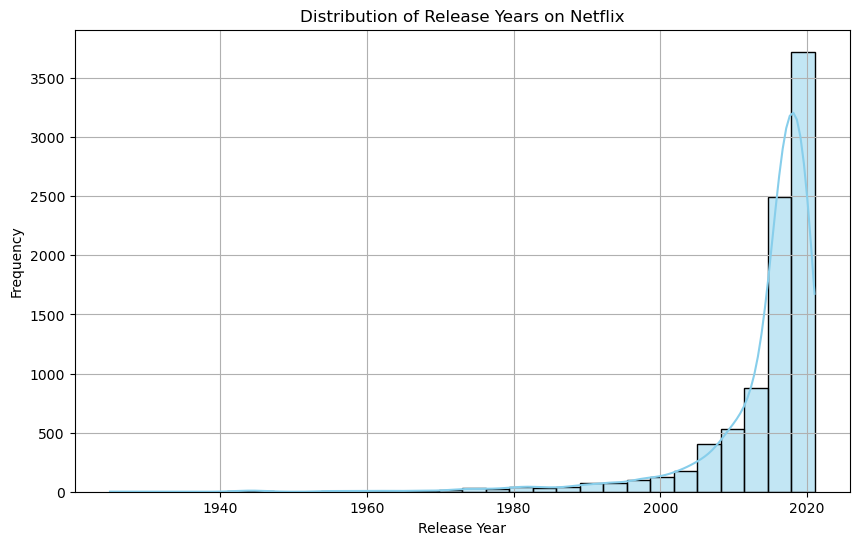

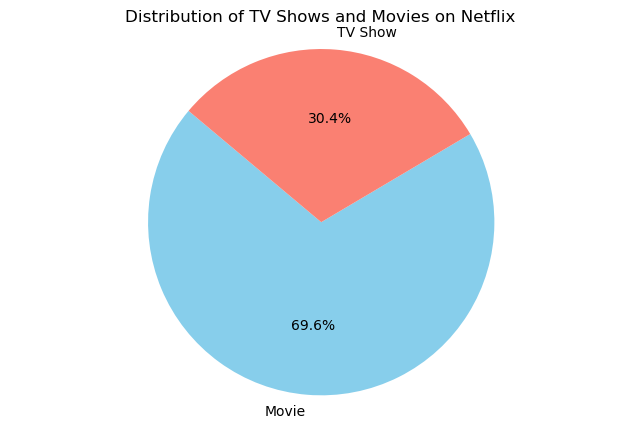

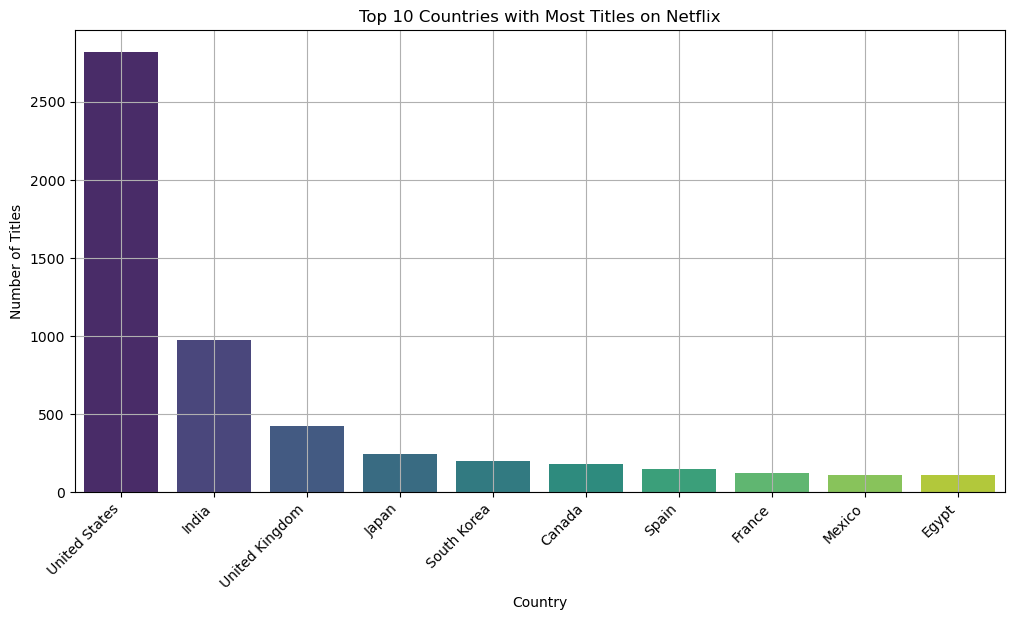

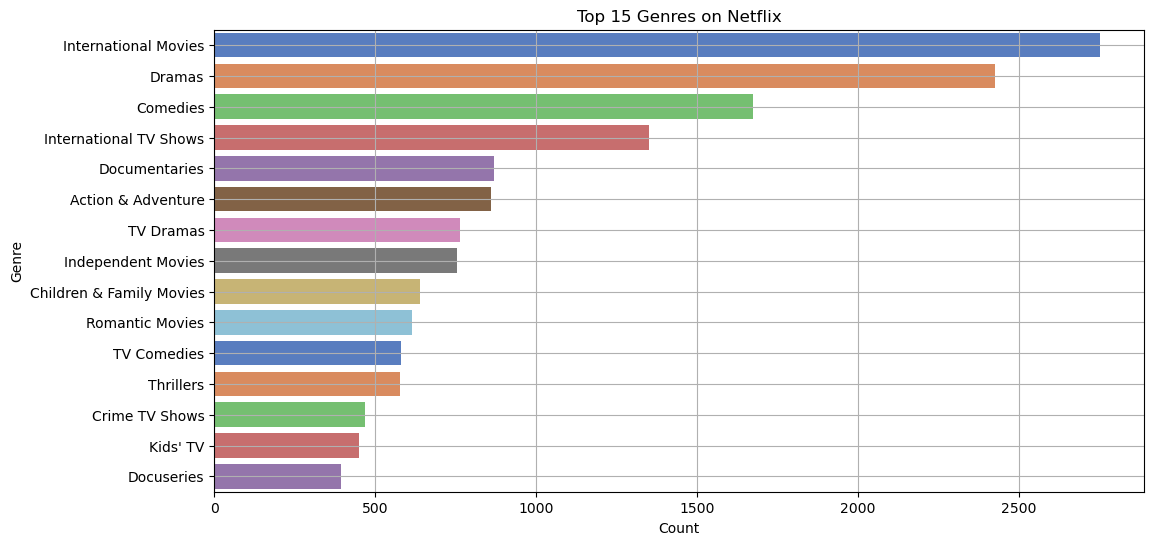

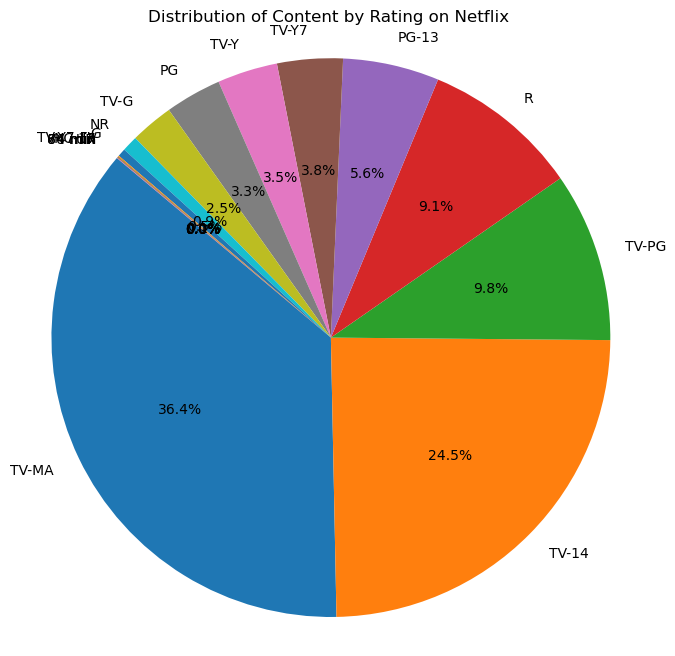

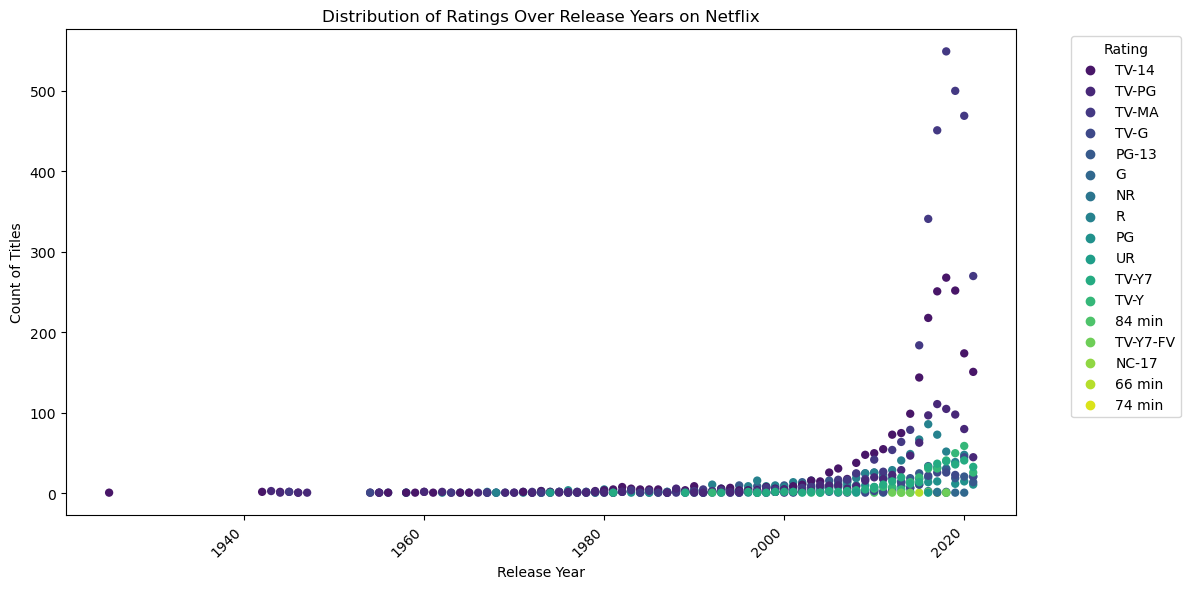

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix data from CSV
netflix_data = pd.read_csv("netflix_titles.csv")

# Display basic information about the dataset
print("Basic information about the Netflix dataset:")
print(netflix_data.info())

# Display first few rows of the dataframe
print("\nFirst few rows of the data:")
print(netflix_data.head())

# Summary statistics
print("\nSummary statistics:")
print(netflix_data.describe())

# Check for missing values
print("\nMissing values:")
print(netflix_data.isnull().sum())

# Plot distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years on Netflix')
plt.grid(True)
plt.show()

# Plot count of TV shows vs. movies
plt.figure(figsize=(8, 5))
type_counts = netflix_data['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Distribution of TV Shows and Movies on Netflix')
plt.axis('equal')
plt.show()

# Plot count of titles by country
top_countries = netflix_data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.grid(True)
plt.show()

# Plot count of titles by genre
plt.figure(figsize=(12, 6))
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts().head(15)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='muted')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 15 Genres on Netflix')
plt.grid(True)
plt.show()

# Plot distribution of ratings
plt.figure(figsize=(8, 8))
rating_counts = netflix_data['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content by Rating on Netflix')
plt.axis('equal')
plt.show()
# Group the data by release year and rating, and calculate the count of titles
rating_counts_by_year = netflix_data.groupby(['release_year', 'rating']).size().reset_index(name='count')

# Set up the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rating_counts_by_year, x='release_year', y='count', hue='rating', palette='viridis', edgecolor='none')
plt.title('Distribution of Ratings Over Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
